# Evaluate water mass properties based on T-S diagrams overall and regionally

In [26]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import glob
import cmocean
import sys
sys.path.append('/home/users/birgal/')
from nemo_python_git.plots import circumpolar_plot, finished_plot, plot_ts_distribution
from nemo_python_git.file_io import read_dutrieux
from nemo_python_git.grid import extract_var_region
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [27]:
run_folder  = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test4/'
nemo_mesh   = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/mesh_mask-20240305.nc'
nemo_domain = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/domain_cfg-20240305.nc'

In [28]:
# load observations
obs = read_dutrieux(eos='teos10')

# load B-SOSE ICs
ICs_S = xr.open_dataset('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/initial-conditions/SOSE-AbsSal-initial-conditions-20240507.nc')
ICs_T = xr.open_dataset('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/initial-conditions/SOSE-ConsTemp-initial-conditions-20240507.nc')

# extract specific region
amundsen_ICS = extract_var_region(ICs_S.isel(time_counter=0), 'AbsSal'  , 'amundsen_sea')
amundsen_ICT = extract_var_region(ICs_T.isel(time_counter=0), 'ConsTemp', 'amundsen_sea')
amundsen_ICS = xr.where(amundsen_ICS==9999, np.nan, amundsen_ICS)
amundsen_ICT = xr.where(amundsen_ICT==9999, np.nan, amundsen_ICT)

In [21]:
def plot_distr(amundsen_so, amundsen_to, date='', smin=32.5, smax=35, tmin=-2.5, tmax=2, nbins1=350):

    # --- plot distributions -----
    fig, ax = plt.subplots(1,1,figsize=(8,7), dpi=150)
    ax.set_title(f'Amundsen Sea simulations: {date}')
    plot_ts_distribution(ax, amundsen_so.values.flatten(), amundsen_to.values.flatten(), plot_density=True, 
                         plot_freeze=True, bins=nbins1, smin=smin, smax=smax, tmin=tmin, tmax=tmax)
    
    return fig, ax

In [ ]:
def plot_distr(amundsen_so, amundsen_to, date='', smin=32.5, smax=35, tmin=-2.5, tmax=2, nbins1=350, nbins2=350, nbins3=500):
    
    # --- plot distributions -----
    fig, ax = plt.subplots(1,3,figsize=(18,5), dpi=300)
    ax[0].set_title('Amundsen Sea B-SOSE ICs')
    plot_ts_distribution(ax[0], amundsen_ICS.values.flatten(), amundsen_ICT.values.flatten(), plot_density=True, 
                         plot_freeze=True, bins=nbins1, smin=smin, smax=smax, tmin=tmin, tmax=tmax)
    ax[1].set_title('Amundsen Sea simulations')
    plot_ts_distribution(ax[1], amundsen_so.values.flatten(), amundsen_to.values.flatten(), plot_density=True, 
                         plot_freeze=True, bins=nbins2, smin=smin, smax=smax, tmin=tmin, tmax=tmax)
    ax[2].set_title('Amundsen Sea observations Pierre')
    plot_ts_distribution(ax[2], obs.AbsSal.values.flatten(), obs.ConsTemp.values.flatten(), plot_density=True, 
                         plot_freeze=True, bins=nbins3, smin=smin, smax=smax, tmin=tmin, tmax=tmax)
    
    return fig, ax

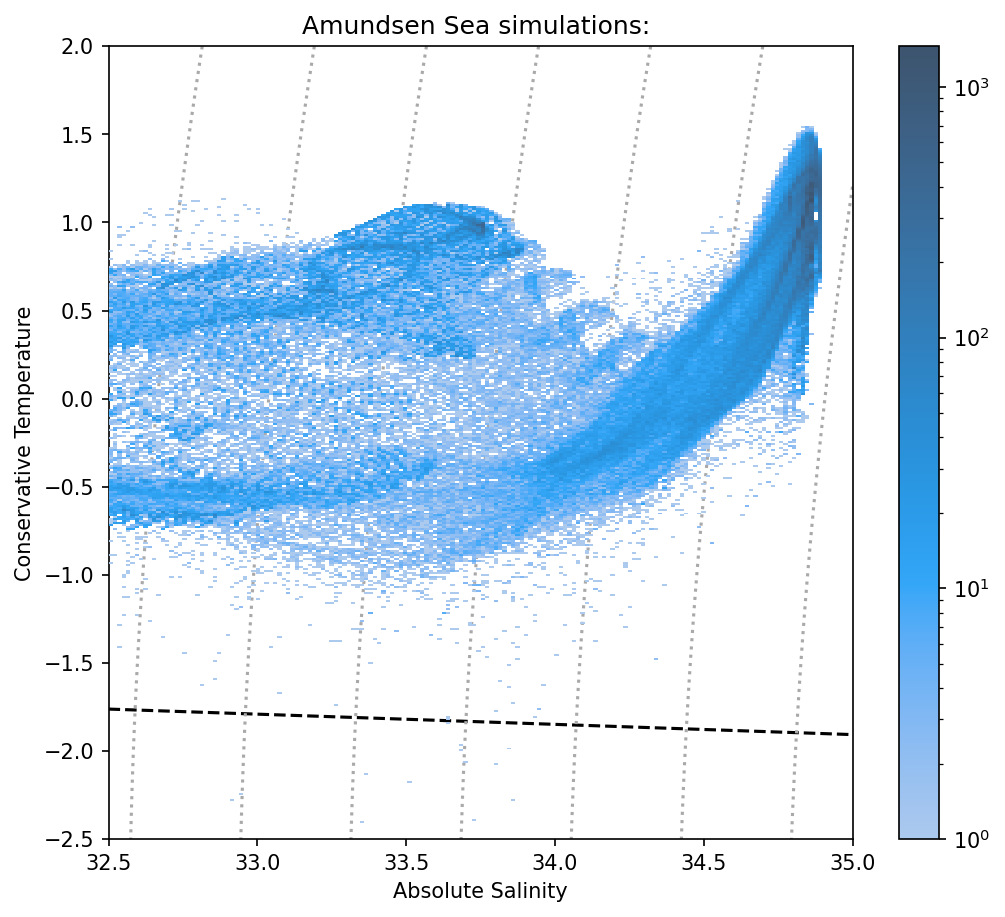

In [22]:
fig, ax = plot_distr(amundsen_so, amundsen_to)

In [14]:
# load nemo simulations
gridT_files  = glob.glob('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test5/new_ICs_n_icb/files/*grid_T*')
# gridT_files  = glob.glob(f'{run_folder}files/*1979*grid_T*') # load all the gridT files in the run folder
nemo_ds      = xr.open_mfdataset(gridT_files).rename({'x_grid_T':'x','y_grid_T':'y'}) 
dates_month  = nemo_ds.time_counter.dt.month
dates_summer = ((dates_month==1) | (dates_month==2) | (dates_month==3) | (dates_month==12))
# nemo_average = nemo_ds.isel(time_counter=dates_summer).mean(dim='time_counter')
nemo_average = nemo_ds.isel(time_counter=slice(50,55)).mean(dim='time_counter')    

amundsen_so  = extract_var_region(nemo_average, 'so'    , 'amundsen_sea')
amundsen_to  = extract_var_region(nemo_average, 'thetao', 'amundsen_sea')

amundsen_so = amundsen_so.isel(x=slice(400, 900), y=slice(150,300))
amundsen_to = amundsen_to.isel(x=slice(400, 900), y=slice(150,300))

Dates: Day 101-106

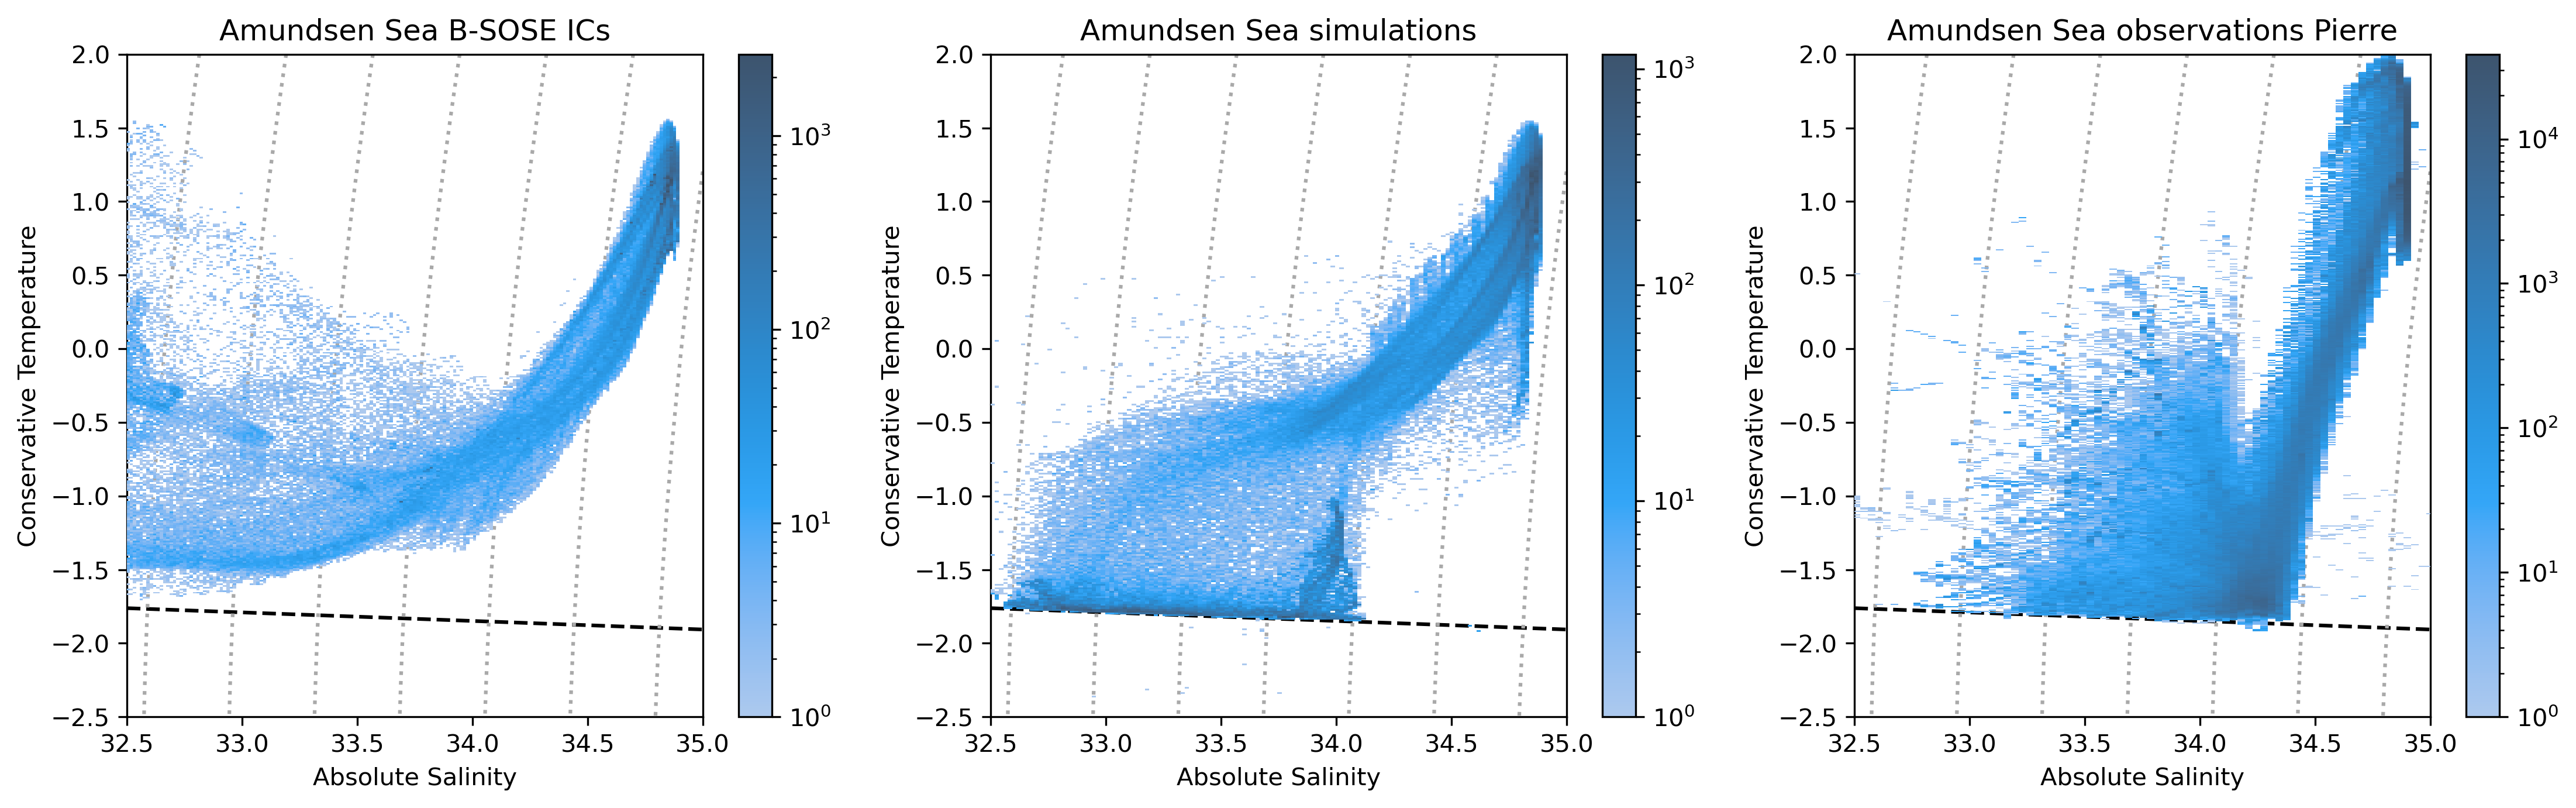

In [13]:
fig, ax = plot_distr(amundsen_so, amundsen_to)

Dates: Day 51-56

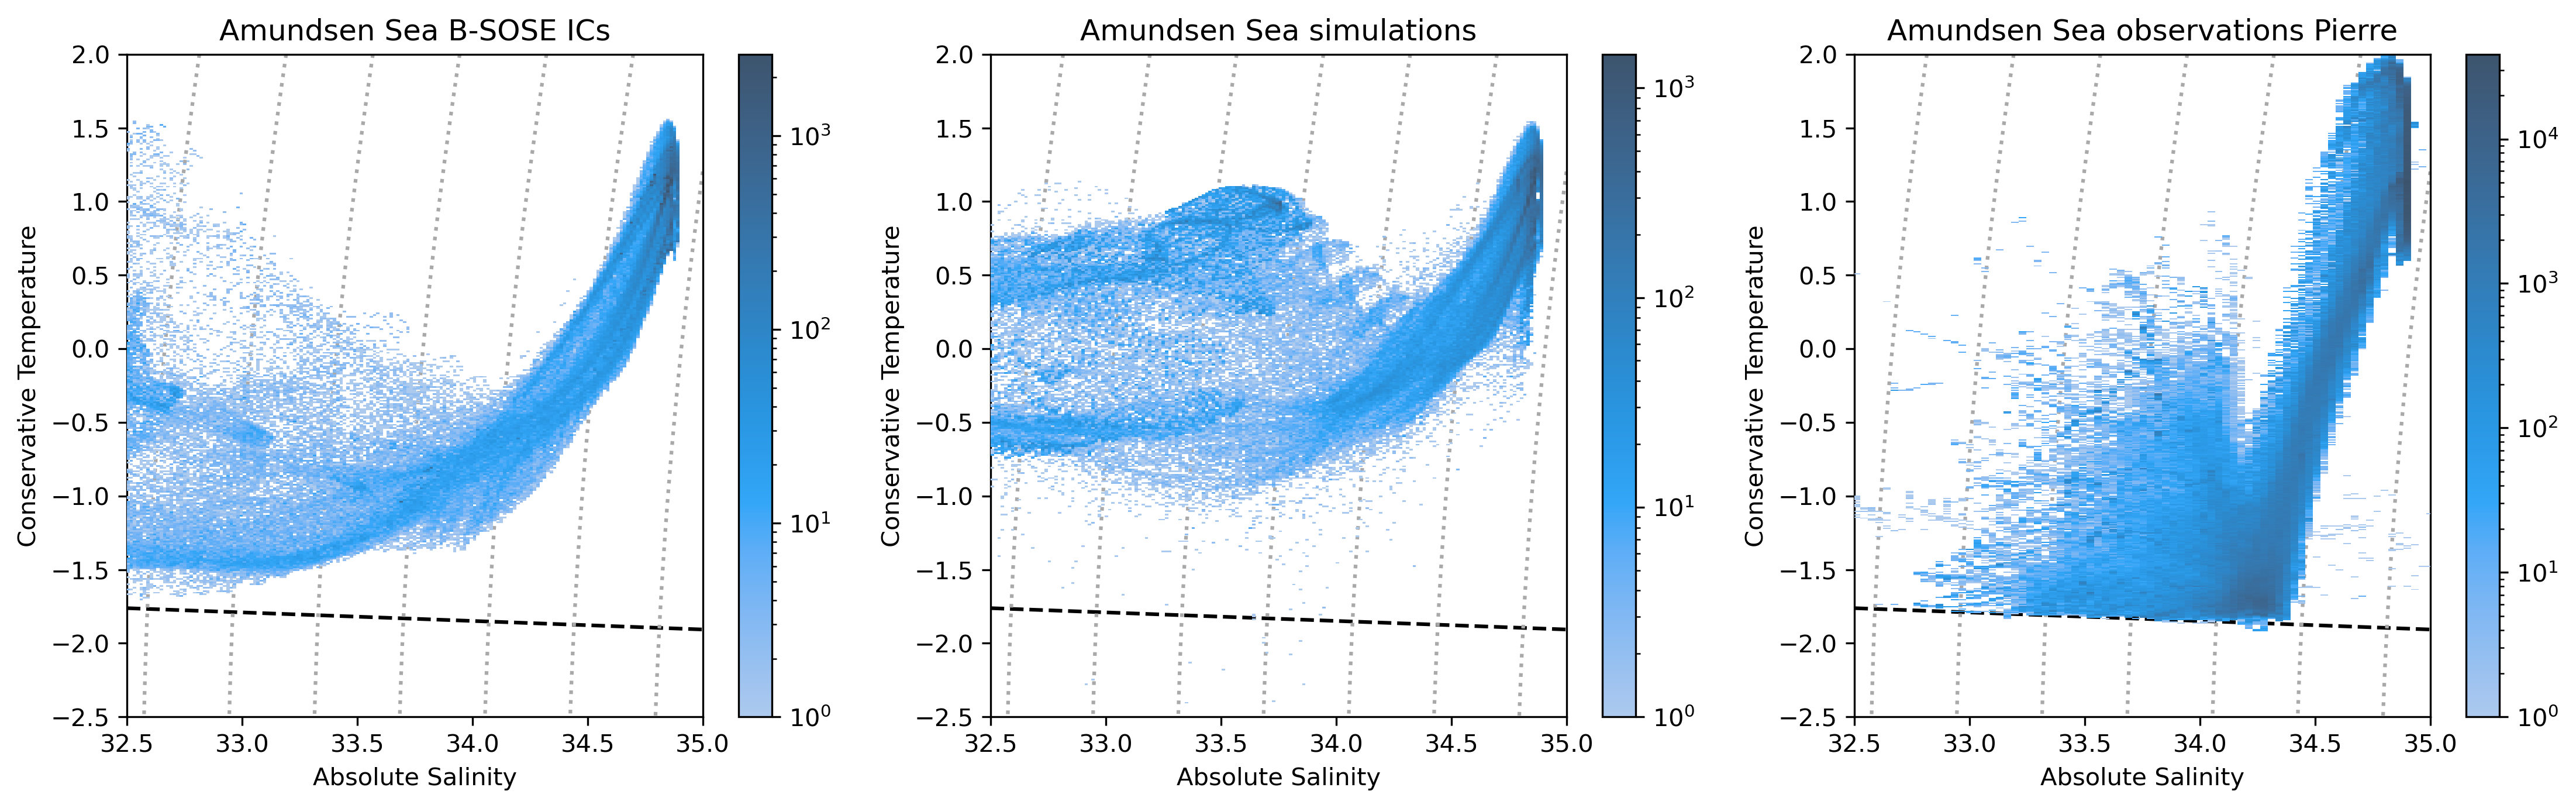

In [16]:
fig, ax = plot_distr(amundsen_so, amundsen_to)

Dates: Jan. 1-5

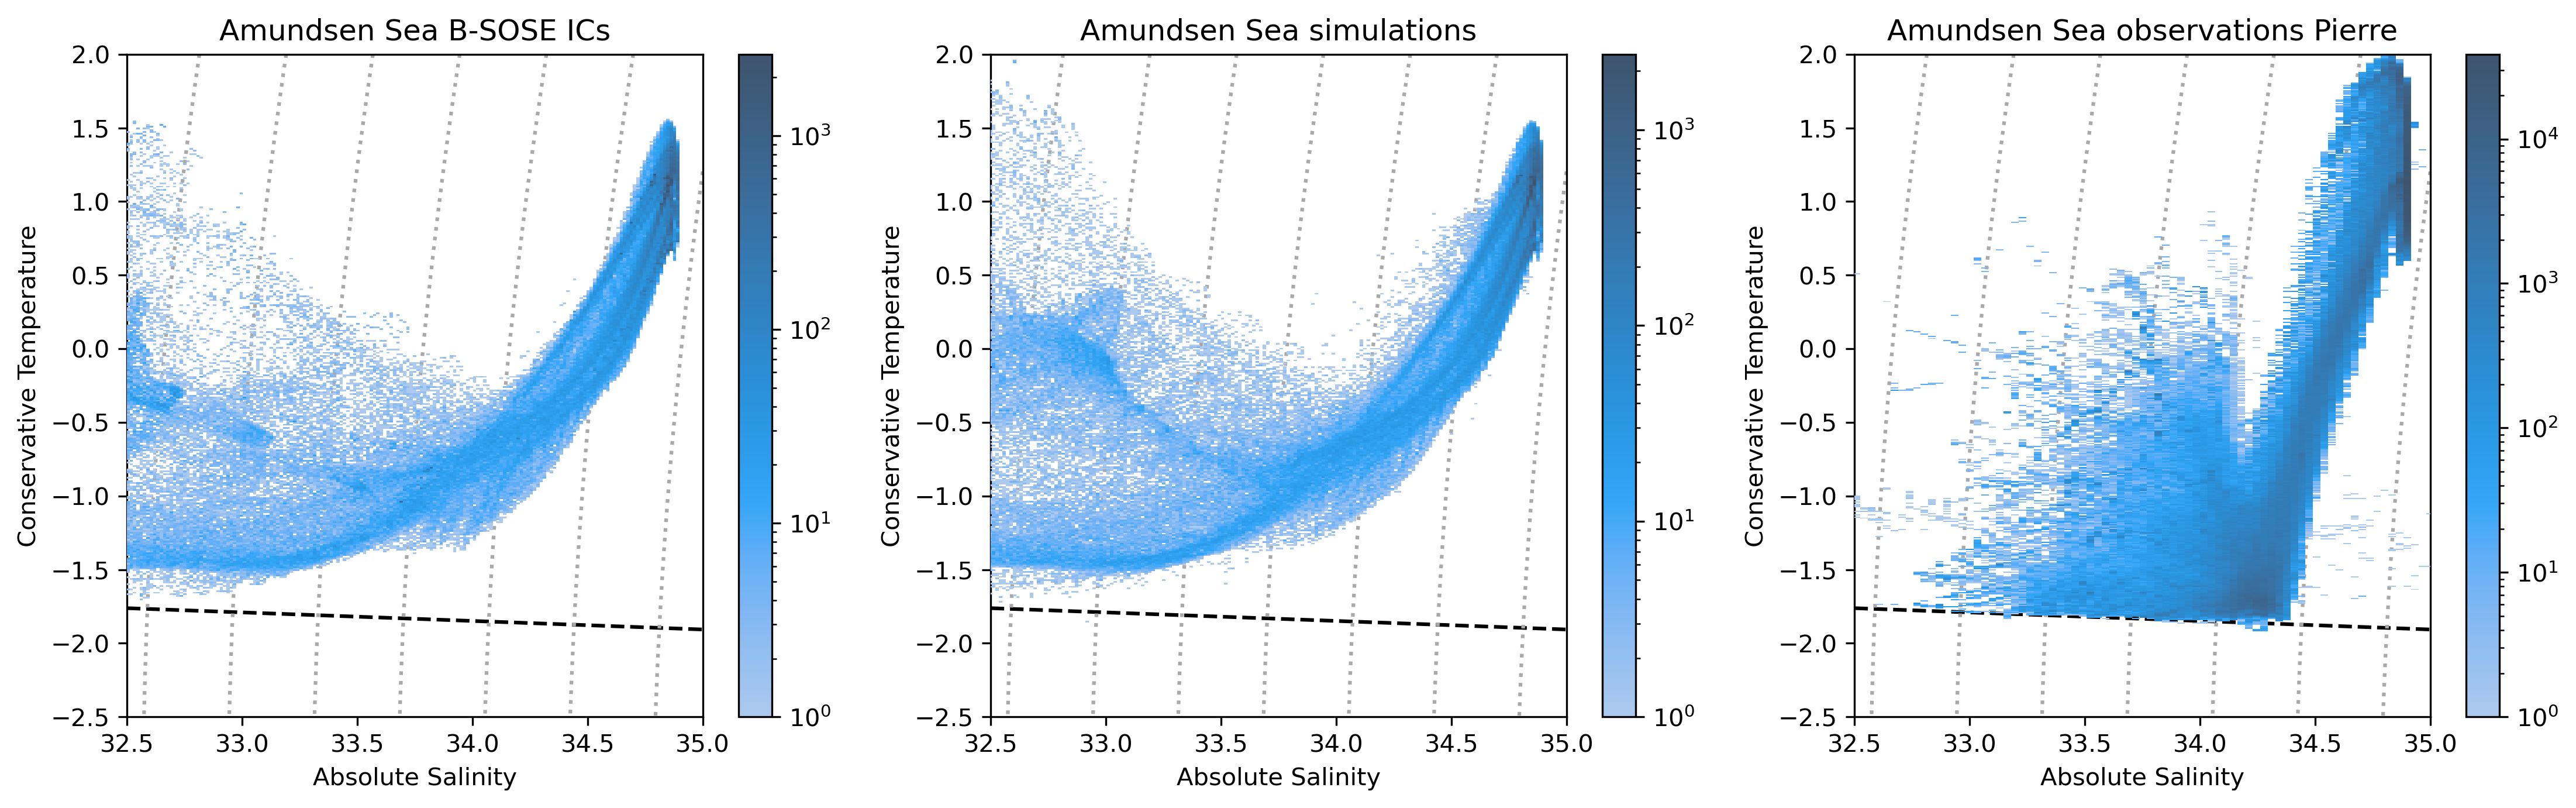

In [6]:
fig, ax = plot_distr(amundsen_so, amundsen_to)

In [12]:
# load nemo simulations
# gridT_files  = glob.glob('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/output/ERA5_test5/new_ICs_n_icb/files/*grid_T*')
gridT_files  = glob.glob(f'{run_folder}files/*1979*grid_T*') # load all the gridT files in the run folder
nemo_ds      = xr.open_mfdataset(gridT_files).rename({'x_grid_T':'x','y_grid_T':'y'}) 
dates_month  = nemo_ds.time_counter.dt.month
dates_summer = ((dates_month==1))# | (dates_month==2) | (dates_month==3) | (dates_month==12))
nemo_average = nemo_ds.isel(time_counter=dates_summer).mean(dim='time_counter')
# nemo_average = nemo_ds.mean(dim='time_counter')    

amundsen_so  = extract_var_region(nemo_average, 'so'    , 'amundsen_sea')
amundsen_to  = extract_var_region(nemo_average, 'thetao', 'amundsen_sea')

In [ ]:
fig, ax = plot_distr(amundsen_so, amundsen_to, nbins2=1000)

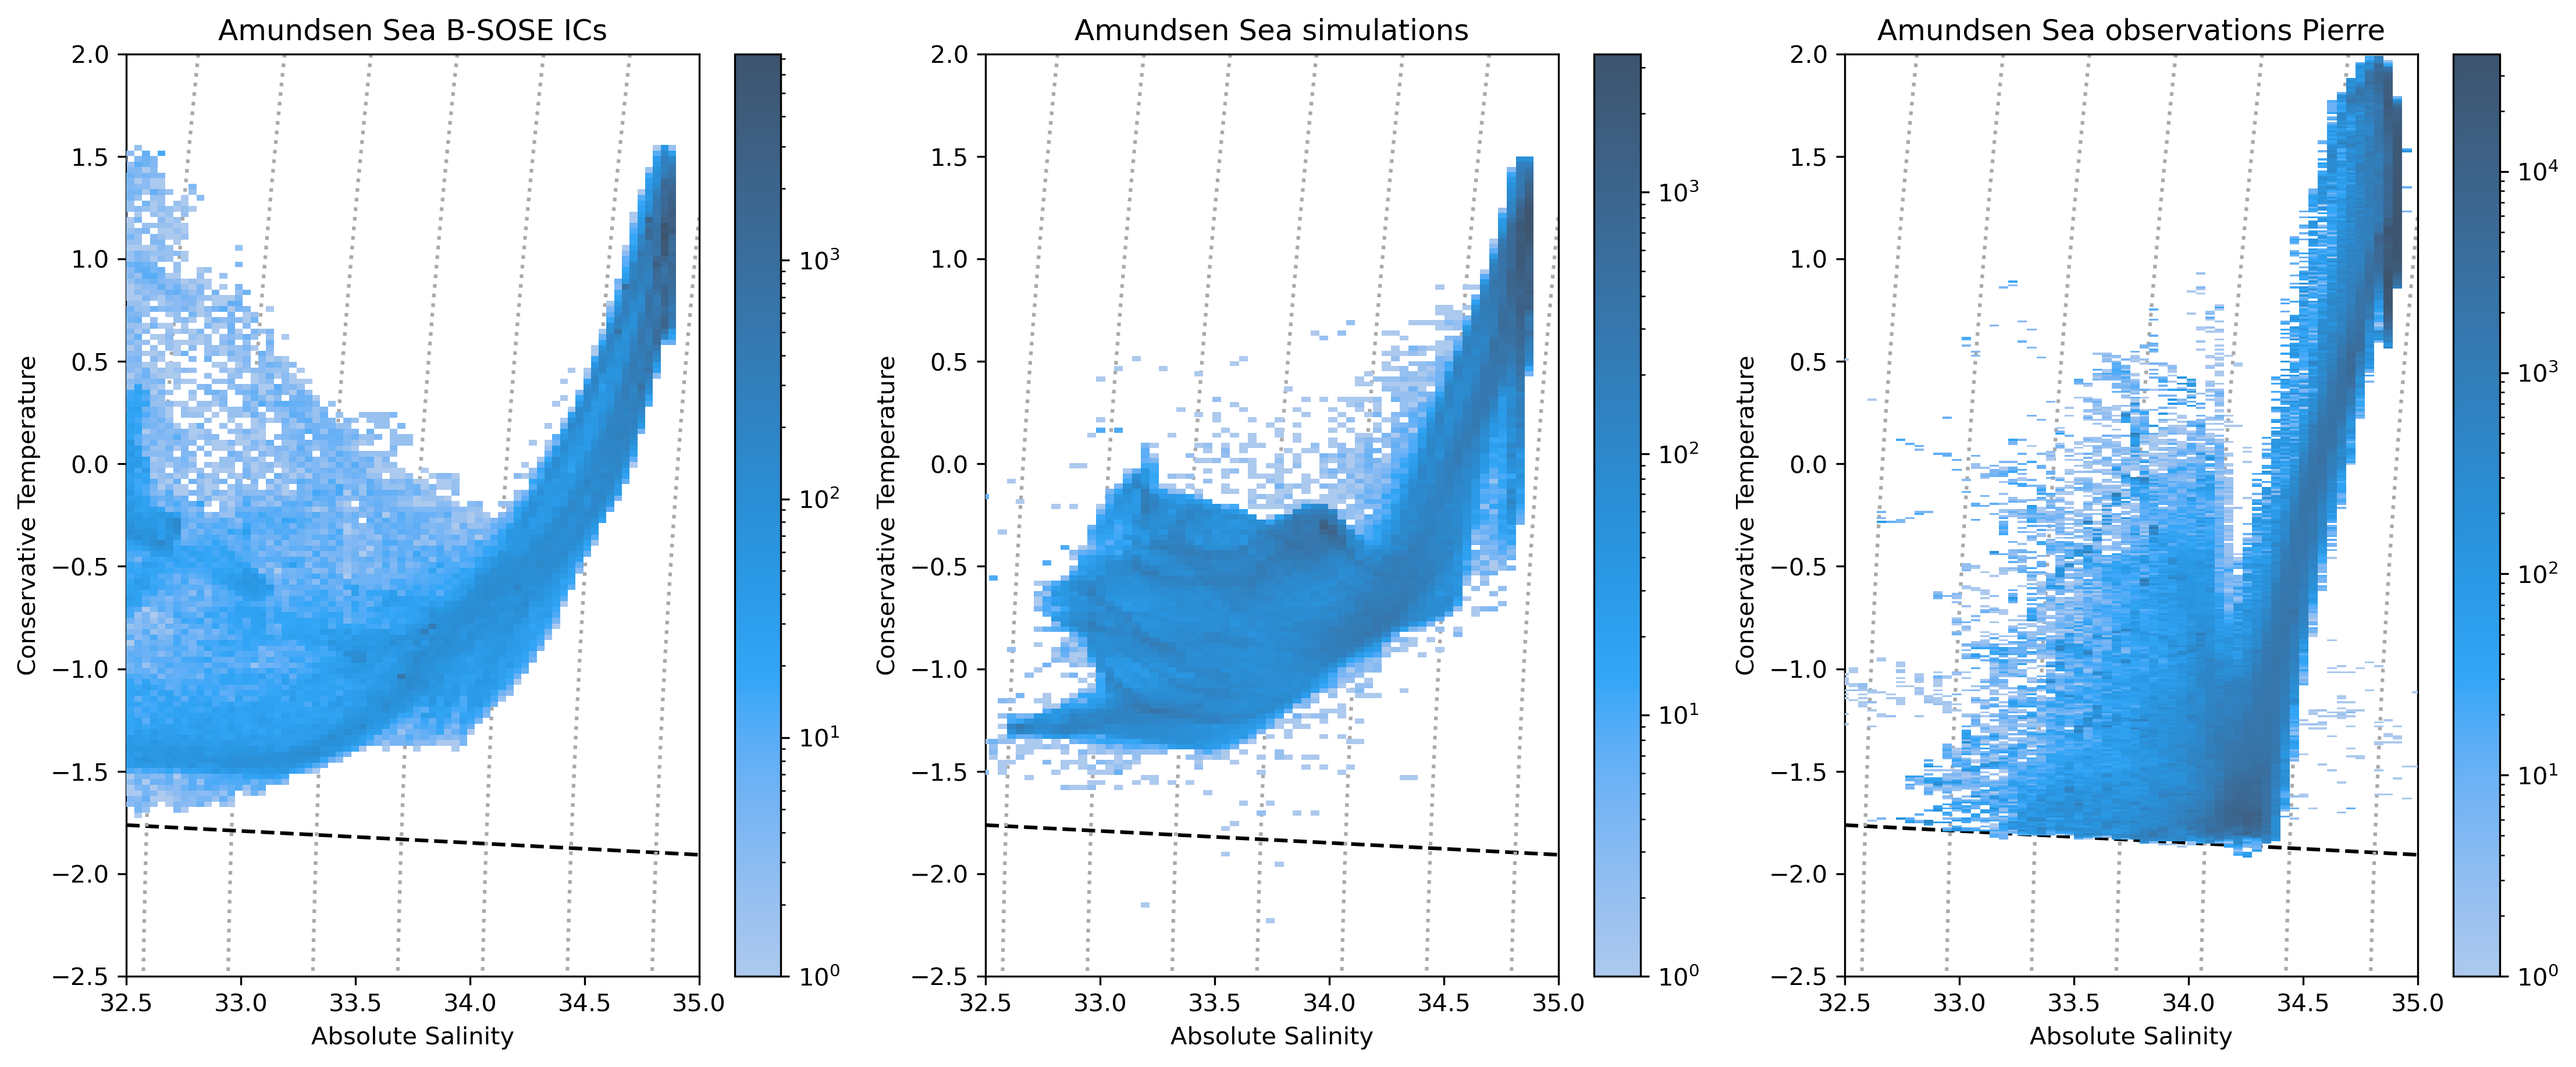

In [6]:
fig, ax = plot_distr(amundsen_so, amundsen_to)

In [4]:
# load files:
nemo_mesh_ds = xr.open_dataset(nemo_mesh)
icemod_files = glob.glob(f'{run_folder}/*icemod*')
nemo_ds      = xr.open_mfdataset(icemod_files) 

/home/users/birgal/.conda/envs/jaspy3.10/lib/python3.10/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/home/users/birgal/.conda/envs/jaspy3.10/lib/python3.10/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/home/users/birgal/.conda/envs/jaspy3.10/lib/python3.10/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


In [34]:
def plot_ocean(nemo_mesh, file_var):
    lon_plot = np.ma.masked_where(mesh_sub.tmask.isel(nav_lev=0) == 0, mesh_sub.nav_lon.values)
    lat_plot = np.ma.masked_where(mesh_sub.tmask.isel(nav_lev=0) == 0, mesh_sub.nav_lat.values)
    plot_var = np.ma.masked_where(mesh_sub.tmask.isel(nav_lev=0) == 0, file_var.values)
    return lon_plot, lat_plot, plot_var 

In [40]:
def plot_land(nemo_mesh, file_var):
    lon_plot = np.ma.masked_where(mesh_sub.tmask.isel(nav_lev=0) != 0, mesh_sub.nav_lon.values)
    lat_plot = np.ma.masked_where(mesh_sub.tmask.isel(nav_lev=0) != 0, mesh_sub.nav_lat.values)
    plot_var = np.ma.masked_where(mesh_sub.tmask.isel(nav_lev=0) != 0, file_var.values)
    return lon_plot, lat_plot, plot_var 

### Visualize T-S diagram for full domain for one month 
Then, figure out how to visualize changes over time

In [ ]:
# calculate annual cumulative sea ice production and compare with: https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2007GL032903

### Same as above, but subdivide into regions

### Focus on the Amundsen Sea region specifically